In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, date, timedelta

history = pd.DataFrame()

for i in range(9):
    f = open('spotify_data/StreamingHistory{}.json'.format(i), encoding='utf-8')
    data = json.load(f)
    df = pd.DataFrame(data)
    history = pd.concat([history, df], ignore_index=True)

history = history.loc[history['trackName'] !="Unknown Track"]
history = history.loc[history['msPlayed'] >=20000]
history['minsPlayed'] = history['msPlayed']/(1000*60)
history['hrsPlayed'] = history['msPlayed']/(1000*60*60)

spring = history.loc[history['endTime']<'2022-05-11'].copy()
summer = history.loc[(history['endTime']>='2022-05-11') & (history['endTime']<'2022-08-28')].copy()
fall = history.loc[history['endTime']>='2022-08-28'].copy()


summer_home = history.loc[(history['endTime']>='2022-05-11') & (history['endTime']<'2022-06-02')].copy()
summer_sf = history.loc[(history['endTime']>='2022-06-02') & (history['endTime']<'2022-08-28')].copy()


spring['endTime']= pd.DatetimeIndex(spring['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer_home['endTime'] = pd.DatetimeIndex(summer_home['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer_sf['endTime']= pd.DatetimeIndex(summer_sf['endTime']).tz_localize('UTC').tz_convert('America/Los_Angeles').tz_localize(None)
fall['endTime']= pd.DatetimeIndex(fall['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
history = pd.concat([spring, summer_home, summer_sf, fall], ignore_index=True)

summer = pd.concat([summer_home, summer_sf], ignore_index=True)

history['date'] = pd.DatetimeIndex(history['endTime']).date.astype(str)
history['year'] = pd.DatetimeIndex(history['endTime']).year
history['month'] = pd.DatetimeIndex(history['endTime']).month
history['day'] = pd.DatetimeIndex(history['endTime']).day
history['hour'] = pd.DatetimeIndex(history['endTime']).hour
history['dayofweek'] = pd.DatetimeIndex(history['endTime']).dayofweek




# start = history['endTime'][0]
# dt = pd.to_datetime(start).date()
# start = dt - timedelta(days = (dt.weekday() + 1) % 7)

def get_week_index(x):
    dt = pd.to_datetime(x).date()
    return dt - timedelta(days = (dt.weekday() + 1) % 7)

history['week'] = history['endTime'].apply(lambda x: get_week_index(x))
history['dayofweek'] = history['dayofweek'].apply(lambda x: (x+1)%7)
history

,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,date,year,month,day,hour,dayofweek,week
0,2021-12-31 19:03:00,Swedish House Mafia,Save The World,209705,3.495083,0.058251,2021-12-31,2021,12,31,19,5,2021-12-26
1,2021-12-31 19:06:00,Sam Feldt,Post Malone (feat. RANI),169642,2.827367,0.047123,2021-12-31,2021,12,31,19,5,2021-12-26
2,2021-12-31 19:09:00,Tiësto,Wasted,190013,3.166883,0.052781,2021-12-31,2021,12,31,19,5,2021-12-26
3,2021-12-31 19:13:00,Lana Del Rey,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,214912,3.581867,0.059698,2021-12-31,2021,12,31,19,5,2021-12-26
4,2021-12-31 19:17:00,Calvin Harris,This Is What You Came For,222160,3.702667,0.061711,2021-12-31,2021,12,31,19,5,2021-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67088,2023-01-01 18:28:00,Will Gittens,Vibin,47143,0.785717,0.013095,2023-01-01,2023,1,1,18,0,2023-01-01
67089,2023-01-01 18:33:00,Dayglow,Can I Call You Tonight?,278769,4.646150,0.077436,2023-01-01,2023,1,1,18,0,2023-01-01
67090,2023-01-01 18:36:00,ILLENIUM,First Time,165779,2.762983,0.046050,2023-01-01,2023,1,1,18,0,2023-01-01
67091,2023-01-01 18:40:00,Martin Garrix,No Sleep (feat. Bonn) - DubVision Remix,239062,3.984367,0.066406,2023-01-01,2023,1,1,18,0,2023-01-01


# **Distribution of listening during times of the day**

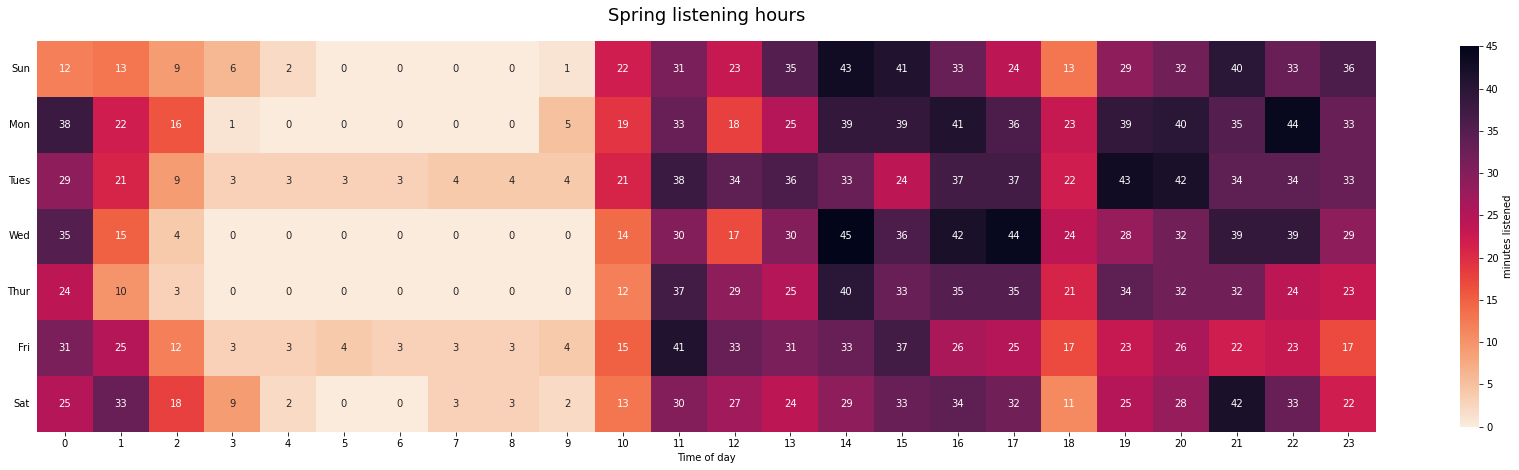

In [60]:
from datetime import datetime

d1 = '2022-01-22'
d2 = '2022-05-12'
weeks = (datetime.strptime(d2, '%Y-%m-%d')-datetime.strptime(d1, '%Y-%m-%d')).days/7

spring_history = history.loc[(history['endTime']< d2) & (history['endTime']> d1)]
listening_times = spring_history.groupby(['dayofweek', 'hour'])['minsPlayed'].sum()//weeks
listening_times = listening_times.unstack(fill_value=0)

plt.figure(figsize=(30,20))
plt.title('Spring Listening Hours', fontsize=18, pad=20)

ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'],cmap="rocket_r", cbar_kws={"shrink": .35, 'label': 'minutes listened'})
plt.ylabel('')
plt.xlabel('Time of day')
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.tick_params(left= False, bottom = True)
plt.show()


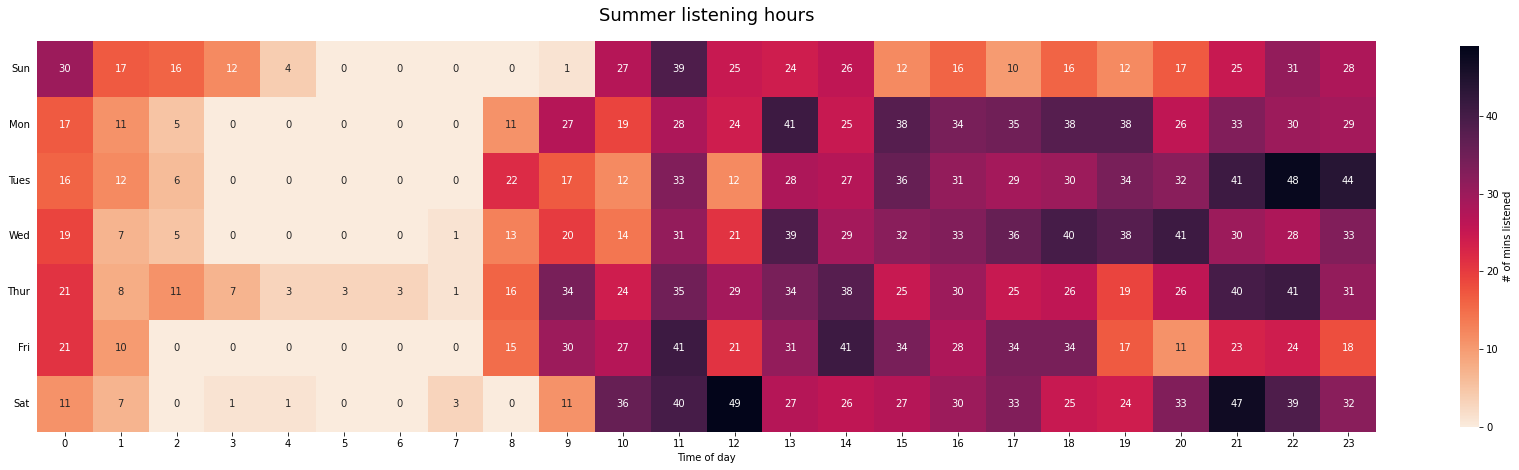

In [56]:

d2 = '2022-08-28'
d1 = '2022-05-12'

weeks = (datetime.strptime(d2, '%Y-%m-%d')-datetime.strptime(d1, '%Y-%m-%d')).days/7

summer_history = history.loc[(history['endTime']< d2) & (history['endTime']> d1)]

listening_times = summer_history.groupby(['dayofweek', 'hour'])['minsPlayed'].sum()//weeks
listening_times = listening_times.unstack(fill_value=0)

plt.figure(figsize=(30,20))
plt.title('Summer Listening Hours', fontsize=18, pad=20)

ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'],cmap="rocket_r", cbar_kws={"shrink": .35, 'label': 'minutes listened'})
plt.ylabel('')
plt.xlabel('Time of day')
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.tick_params(left= False, bottom = True)
plt.show()


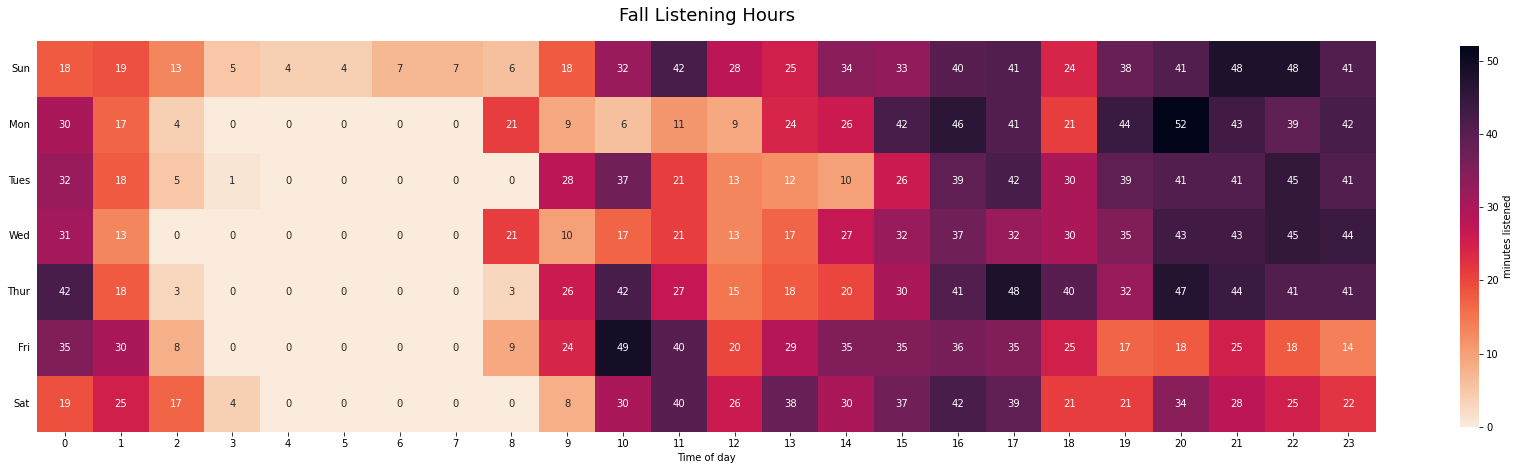

In [61]:
from datetime import datetime

d1 = '2022-08-28'
d2 = '2022-12-23'

weeks = (datetime.strptime(d2, '%Y-%m-%d')-datetime.strptime(d1, '%Y-%m-%d')).days/7

fall_history = history.loc[(history['endTime']>='2022-09-01')&(history['endTime']<'2022-12-23')]
listening_times = fall_history.groupby(['dayofweek', 'hour'])['minsPlayed'].sum()//weeks
listening_times = listening_times.unstack(fill_value=0)

plt.figure(figsize=(30,20))
plt.title('Fall Listening Hours', fontsize=18, pad=20)

ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'],cmap="rocket_r", cbar_kws={"shrink": .35, 'label': 'minutes listened'})
plt.ylabel('')
plt.xlabel('Time of day')
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.tick_params(left= False, bottom = True)
plt.show()


# **Listening over time**

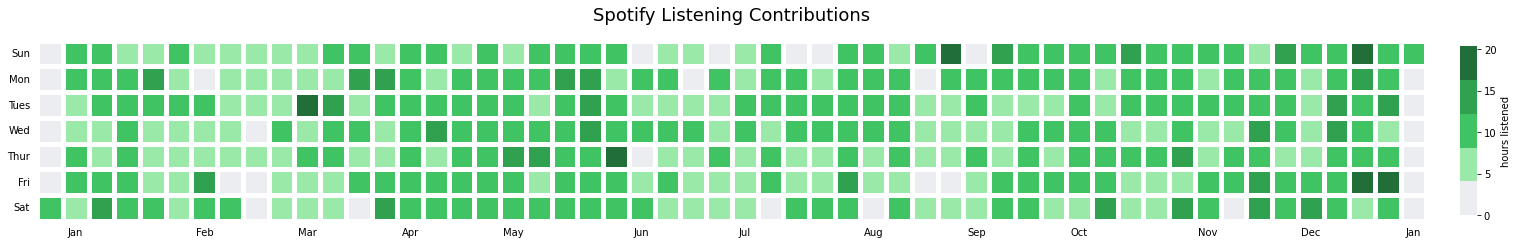

In [65]:
listening_over_year = history.groupby(['dayofweek', 'week'])['hrsPlayed'].sum()
listening_over_year = listening_over_year.unstack(fill_value=0)

pal = ['#ebedf0','#9be9a8', '#40c463','#30a14e','#216e39']
plt.figure(figsize=(30,20))
plt.title('Spotify Listening Contributions', fontsize=18, pad=20)

ax= sns.heatmap(listening_over_year, annot=False, square = True, linewidths=5, cmap=pal, yticklabels=['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', ], cbar_kws={"shrink": .155, 'label': 'hours listened', 'pad':0.02, 'aspect': 10})
plt.ylabel('')
plt.xlabel('')

plt.yticks(rotation = 0)
plt.xticks(rotation = 0)

def first_week(x):
    dt = pd.to_datetime(x)
    if dt.weekday() - dt.day >=-1:
        return dt.strftime("%b")
    return ''

labels = [first_week(x.get_text()) for x in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.tick_params(left= False, bottom = False)

plt.show()



In [67]:
listening_over_time = history.groupby(['date'], as_index=False)['hrsPlayed'].agg(sum)
# listening_over_time['weekly_avg'] = listening_over_time['hrsPlayed'].rolling(7, center=True).mean()
listening_over_time['weekly_avg'] = listening_over_time['hrsPlayed'].rolling(7, win_type='gaussian', center=True).mean(std=2)
# listening_over_time['weekly_avg'] = listening_over_time['hrsPlayed'].ewm(alpha=0.3).mean()
listening_over_time['monthly_avg'] = listening_over_time['hrsPlayed'].rolling(14, win_type='gaussian', center=True).mean(std=3)
listening_over_time

,date,hrsPlayed,weekly_avg,monthly_avg
0,2021-12-31,1.330708,NaN,NaN
1,2022-01-01,8.703352,NaN,NaN
2,2022-01-02,10.214058,NaN,NaN
3,2022-01-03,8.787550,7.842331,NaN
4,2022-01-04,5.849762,8.180557,NaN
...,...,...,...,...
362,2022-12-28,7.598567,12.110709,NaN
363,2022-12-29,12.035158,12.431123,NaN
364,2022-12-30,20.332839,NaN,NaN
365,2022-12-31,9.814108,NaN,NaN


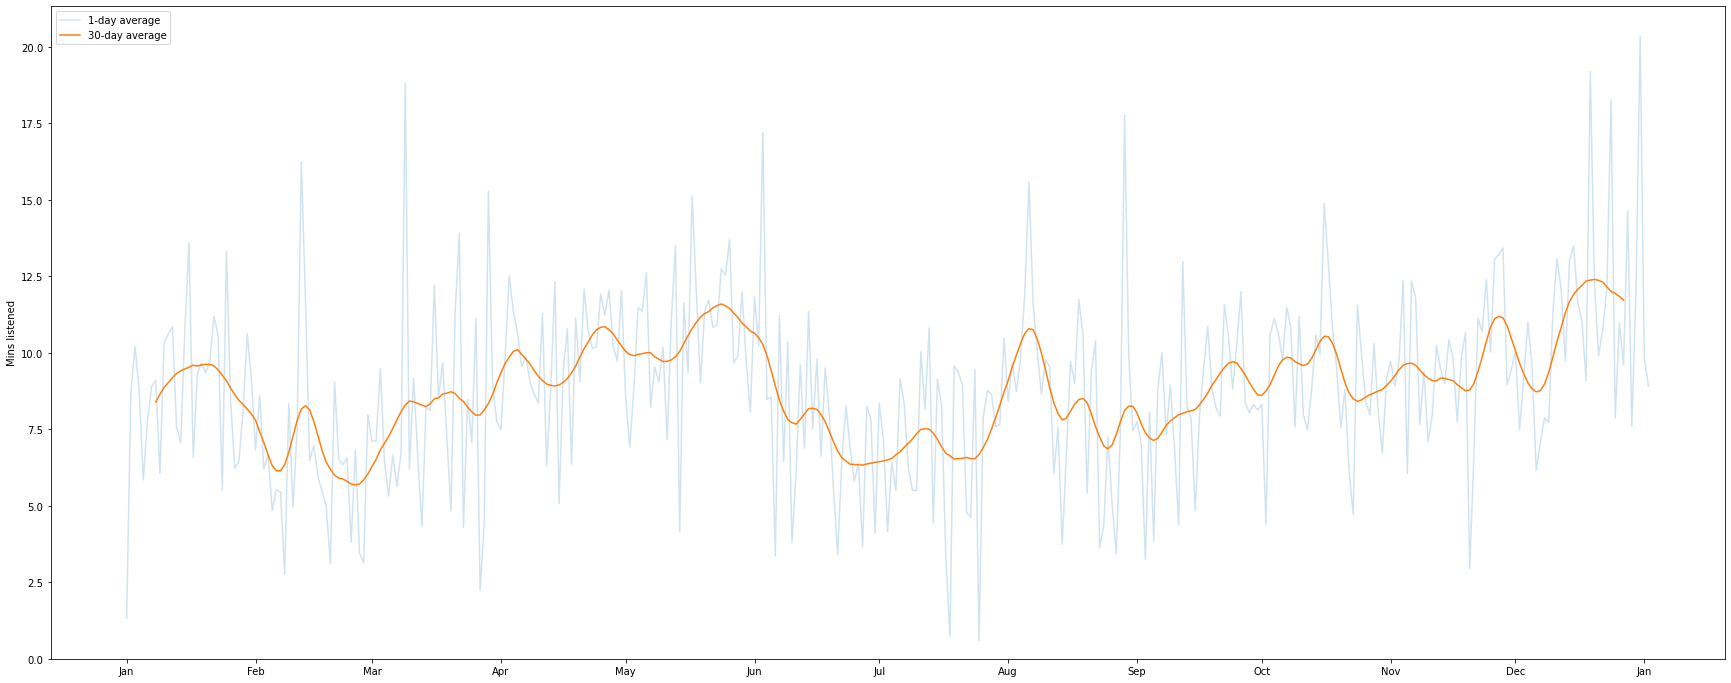

In [68]:
from matplotlib import dates

plt.figure(figsize=(30,12))
ax = sns.lineplot(data = listening_over_time,  x='date', y ='hrsPlayed', label='1-day average', alpha=0.2)
# ax = sns.lineplot(data = listening_over_time,  x='date', y ='weekly_avg', label='7-day average')
ax = sns.lineplot(data = listening_over_time,  x='date', y ='monthly_avg', label='30-day average')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
# ax.despine(bottom=True, left=True)

significant_dates = {'2022-01-24': 'Spring semester start',
                     '2022-03-19': 'Spring recess', 
                     '2022-05-11':'Spring semester end',
                     '2022-06-02': 'First day in SF', 
                     '2022-08-27': 'Last day in SF',
                     '2022-08-31': 'Fall semester start',
                     '2022-10-19': 'October recess',
                     '2022-11-19': 'November recess',
                     '2022-12-23': 'Fall semester end'}
significant_dates={}
for date, desc in significant_dates.items():
    hrs  = np.array(listening_over_time.loc[listening_over_time['date'] ==date, 'weekly_avg'])
    plt.vlines(x=date, ymin=5, ymax=15, color="red", )
    plt.text(date, hrs, desc)

# plt.fill_between(listening_over_time['date'], listening_over_time['weekly_avg'], alpha=0.1)
# plt.title('Spotify listening time')
plt.ylabel("Mins listened")
plt.xlabel("")
plt.ylim(bottom=0)
# plt.legend()
plt.show()

# **Distribution of number of daily listening hours**

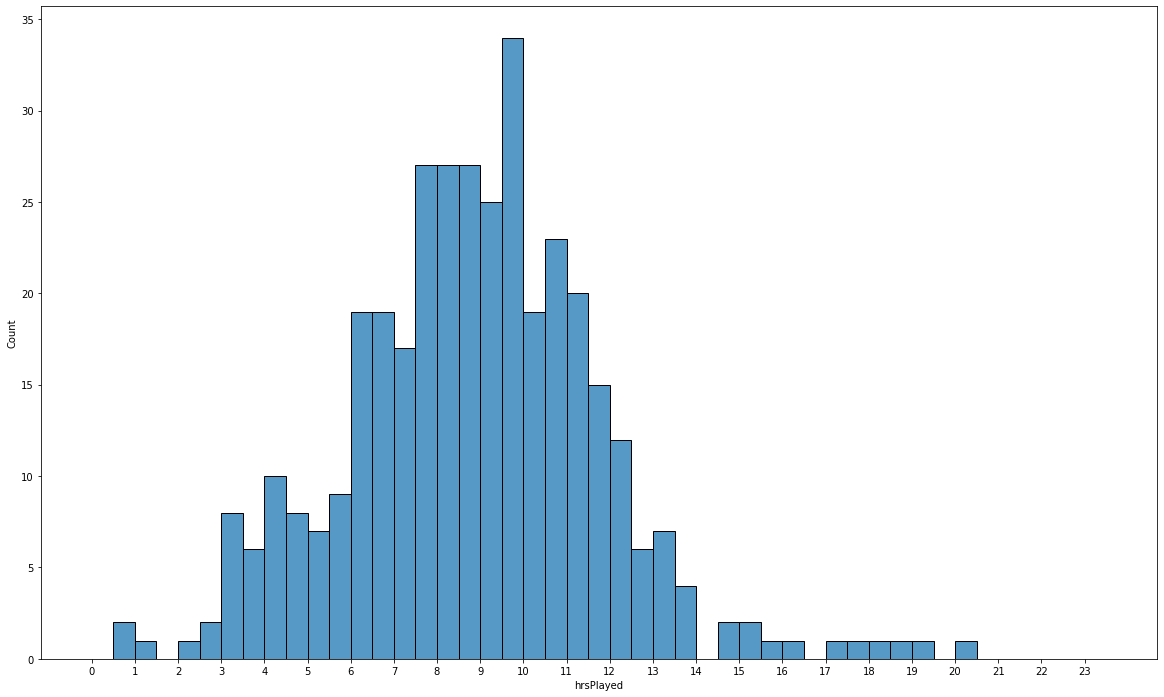

In [11]:
plt.figure(figsize=(20,12))
sns.histplot(listening_over_time['hrsPlayed'], bins=np.arange(0, 24, 0.5))
plt.xticks(np.arange(24))
plt.show()

# **Genre Distribution**

In [12]:
from config import sp
from tqdm import tqdm


artists= {}
for artist in tqdm(set(history['artistName'])):
    try:
        results = sp.search(artist, type='artist')
        artist_id = results.get('artists').get('items')[0].get('uri')
        artist_genres = results.get('artists').get('items')[0].get('genres')
    except Exception as e:
        print(e)
        print(artist)
        artist_id = ''
        artist_genres = []
    artists[artist] = {'genres': artist_genres, 'id': artist_id}
artists_df = pd.DataFrame.from_dict(artists, orient='index')
artists_df

100%|██████████| 4435/4435 [24:56<00:00,  2.96it/s]


,genres,id
Fatb,[big beat],spotify:artist:4Y7tXHSEejGu1vQ9bwDdXW
Dreamer Boy,"[chill r&b, indie pop, indie r&b, nashville in...",spotify:artist:1UJKiAI4Evnhh1ExDse25D
Tchami,"[bass house, deep groove house, edm, electro h...",spotify:artist:1KpCi9BOfviCVhmpI4G2sY
Cyber Soul,[trap beats],spotify:artist:5fgkrGRJJ2FcosHfzHeXOu
Louis The Child,"[edm, electro house, electropop, indie poptimi...",spotify:artist:7wg1qvie3KqDNQbAkTdbX0
...,...,...
Washed Out,"[alternative dance, chillwave, dream pop, indi...",spotify:artist:5juOkIIy18sFw9L30syt1Z
Toledo Rains,[background music],spotify:artist:76uaa6flgNHI5elCp0ssBF
Rita Ora,"[australian pop, dance pop, edm, electropop, p...",spotify:artist:5CCwRZC6euC8Odo6y9X8jr
Ardhito Pramono,"[indonesian jazz, indonesian pop, jazz pop]",spotify:artist:3TkSKriI4EZmTxSFyzs0fd


In [13]:
genres = []
max_genres = 0
for artist in tqdm(history['artistName']):
    max_genres = max(max_genres, len(artists[artist]['genres']))
    
    genres.append(artists[artist]['genres'])
genres_df = pd.DataFrame(genres, columns=['genre{}'.format(i) for i in range(1, max_genres+1)])
genre_history = pd.concat([history, genres_df], axis=1)
genre_history['genres'] =  genres
genre_history

100%|██████████| 67093/67093 [00:00<00:00, 1094608.18it/s]


,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,date,year,month,day,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genre11,genre12,genres
0,2021-12-31 19:03:00,Swedish House Mafia,Save The World,209705,3.495083,0.058251,2021-12-31,2021,12,31,...,pop dance,progressive electro house,None,None,None,None,None,None,None,"[dance pop, edm, electro house, pop dance, pro..."
1,2021-12-31 19:06:00,Sam Feldt,Post Malone (feat. RANI),169642,2.827367,0.047123,2021-12-31,2021,12,31,...,pop,pop dance,pop edm,tropical house,None,None,None,None,None,"[dance pop, edm, electro house, pop, pop dance..."
2,2021-12-31 19:09:00,Tiësto,Wasted,190013,3.166883,0.052781,2021-12-31,2021,12,31,...,dutch edm,edm,house,pop dance,slap house,trance,tropical house,None,None,"[big room, brostep, dance pop, dutch edm, edm,..."
3,2021-12-31 19:13:00,Lana Del Rey,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,214912,3.581867,0.059698,2021-12-31,2021,12,31,...,None,None,None,None,None,None,None,None,None,"[art pop, pop]"
4,2021-12-31 19:17:00,Calvin Harris,This Is What You Came For,222160,3.702667,0.061711,2021-12-31,2021,12,31,...,house,pop,progressive house,uk dance,None,None,None,None,None,"[dance pop, edm, electro house, house, pop, pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67088,2023-01-01 18:28:00,Will Gittens,Vibin,47143,0.785717,0.013095,2023-01-01,2023,1,1,...,None,None,None,None,None,None,None,None,None,[]
67089,2023-01-01 18:33:00,Dayglow,Can I Call You Tonight?,278769,4.646150,0.077436,2023-01-01,2023,1,1,...,None,None,None,None,None,None,None,None,None,"[austindie, indie rock, modern rock]"
67090,2023-01-01 18:36:00,ILLENIUM,First Time,165779,2.762983,0.046050,2023-01-01,2023,1,1,...,tropical house,None,None,None,None,None,None,None,None,"[edm, melodic dubstep, pop dance, tropical house]"
67091,2023-01-01 18:40:00,Martin Garrix,No Sleep (feat. Bonn) - DubVision Remix,239062,3.984367,0.066406,2023-01-01,2023,1,1,...,electro house,pop,pop dance,progressive house,tropical house,None,None,None,None,"[dance pop, dutch edm, edm, electro house, pop..."


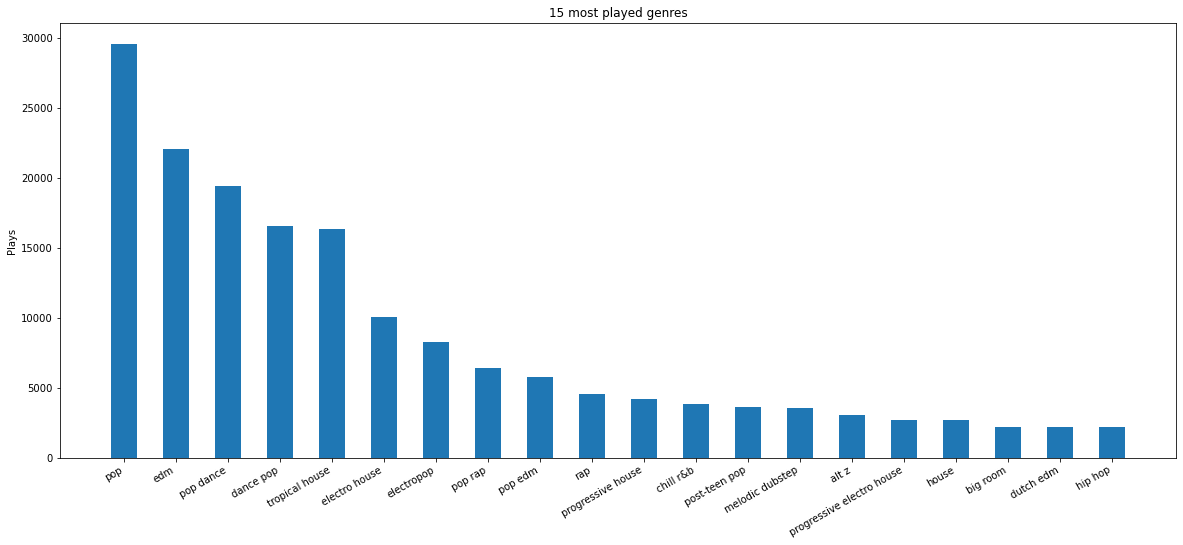

In [14]:
top_genres = (
    genres_df.apply(pd.Series.value_counts)
    .apply(np.sum, axis=1)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'genre', 0: 'count'})
)

width = 0.5
labels, values = top_genres.iloc[:20, 0], top_genres.iloc[:20, 1]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,8))
plt.title('15 most played genres')
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation = 30, ha='right')
plt.ylabel('Plays')
plt.show()


# **Genres over time**

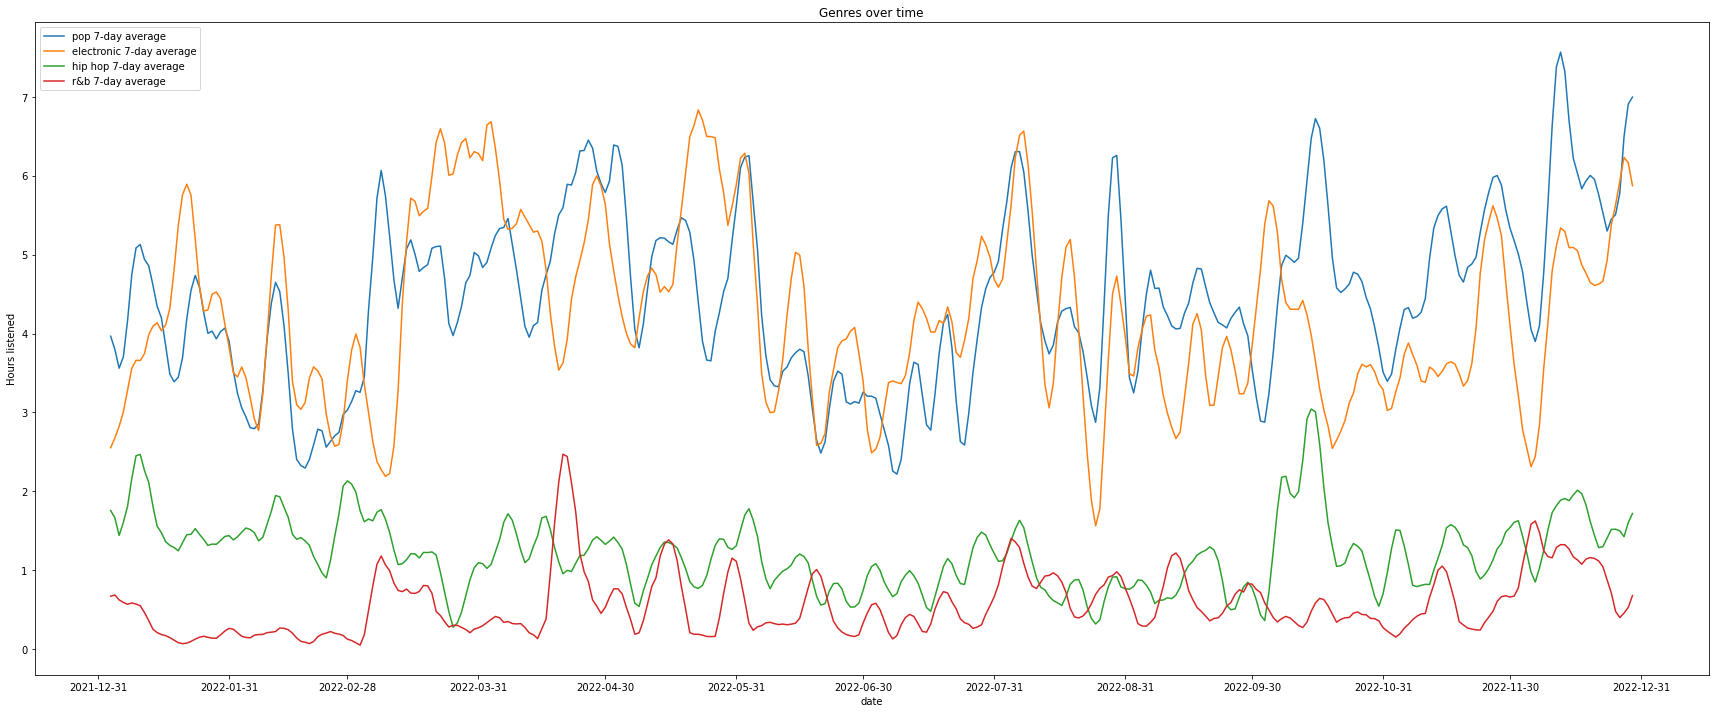

In [16]:
top_genres = {'pop': set(['pop', 'pop rap', 'canadian pop', 'post-teen pop', 'indie poptimism']),
              'electronic': set(['dance pop', 'edm', 'pop dance', 'tropical house', 'electropop', 'electro house', 'trap', 'pop edm']),
              'hip hop': set(['pop rap', 'rap', 'melodic rap', 'hip hop']),
              'r&b': set(['chill r&b', 'alternative r&b', 'r&b'])
              }

genres_over_time = listening_over_time.copy()
genre_histories = {}
for genre, subgenres in top_genres.items():
    df = genre_history.loc[genre_history['genres'].apply(lambda x: list(set(x).intersection(subgenres))).map(len)>0]
    genre_over_time = df.groupby(['date'], as_index=False)['hrsPlayed'].agg(sum)
    genre_over_time.rename(columns = {"hrsPlayed": "{}_hrsPlayed".format(genre)},inplace = True)
    genres_over_time=genres_over_time.merge(genre_over_time, how='left', on = ['date'])
    genres_over_time["{}_hrsPlayed".format(genre)].fillna(value=0,inplace=True)
    genres_over_time[genre+'_weekly_avg'] = genres_over_time[genre+'_hrsPlayed'].rolling(7, win_type='gaussian', center=True).mean(std=2)
    genres_over_time[genre+'_monthly_avg'] = genres_over_time[genre+'_hrsPlayed'].rolling(30, win_type='gaussian', center=True).mean(std=3)
    genre_histories[genre] = genre_over_time


plt.figure(figsize=(30,12))
for genre in top_genres.keys():
    ax = sns.lineplot(data = genres_over_time,  x='date', y =genre+'_weekly_avg', label=genre+' 7-day average')

ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
plt.title('Genres over time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()


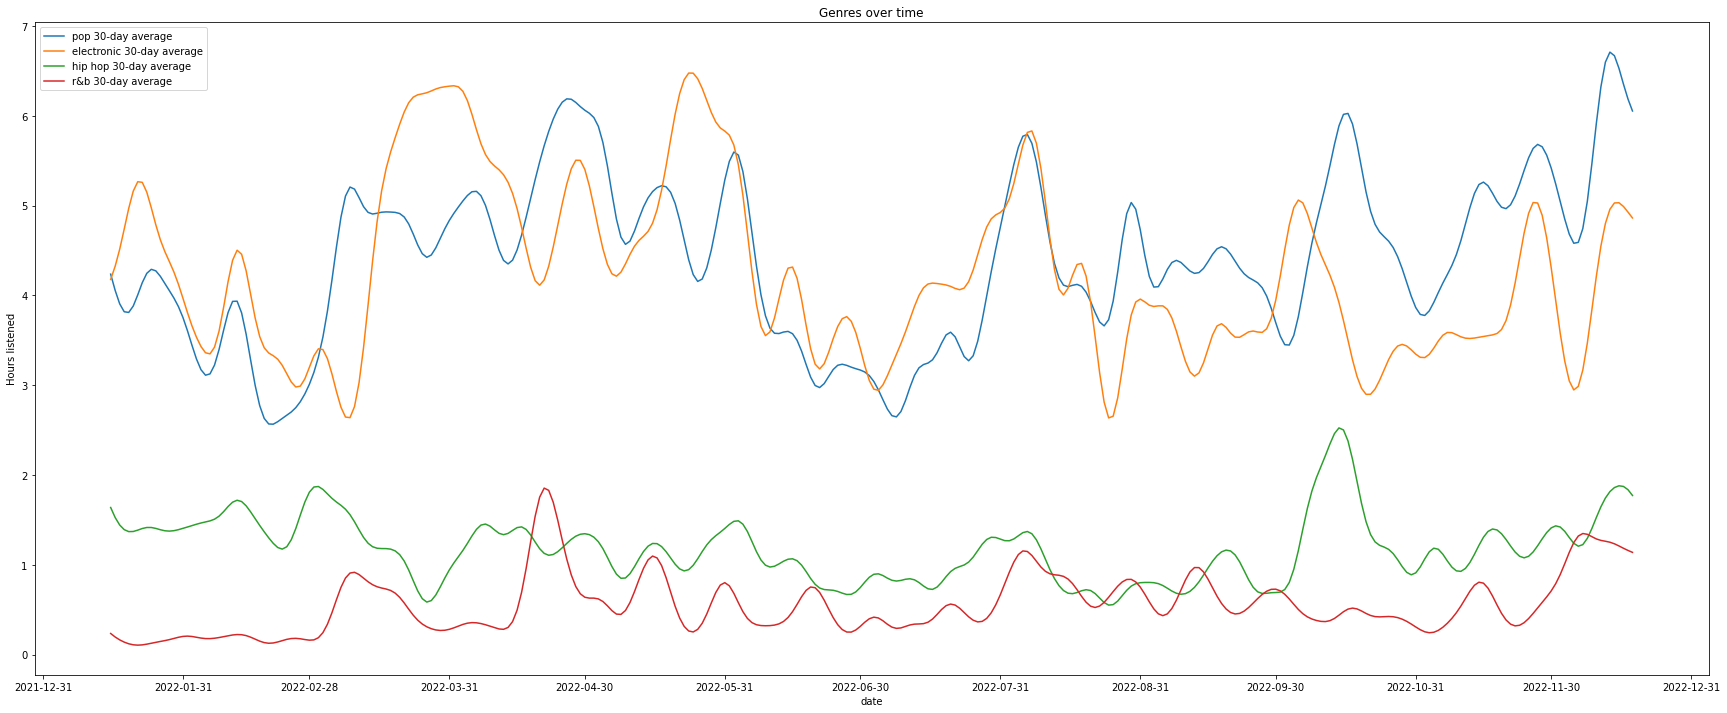

In [17]:
plt.figure(figsize=(30,12))
for genre, subgenres in top_genres.items(): 
    ax = sns.lineplot(data = genres_over_time,  x='date', y =genre+'_monthly_avg', label=genre+' 30-day average')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
plt.title('Genres over time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()


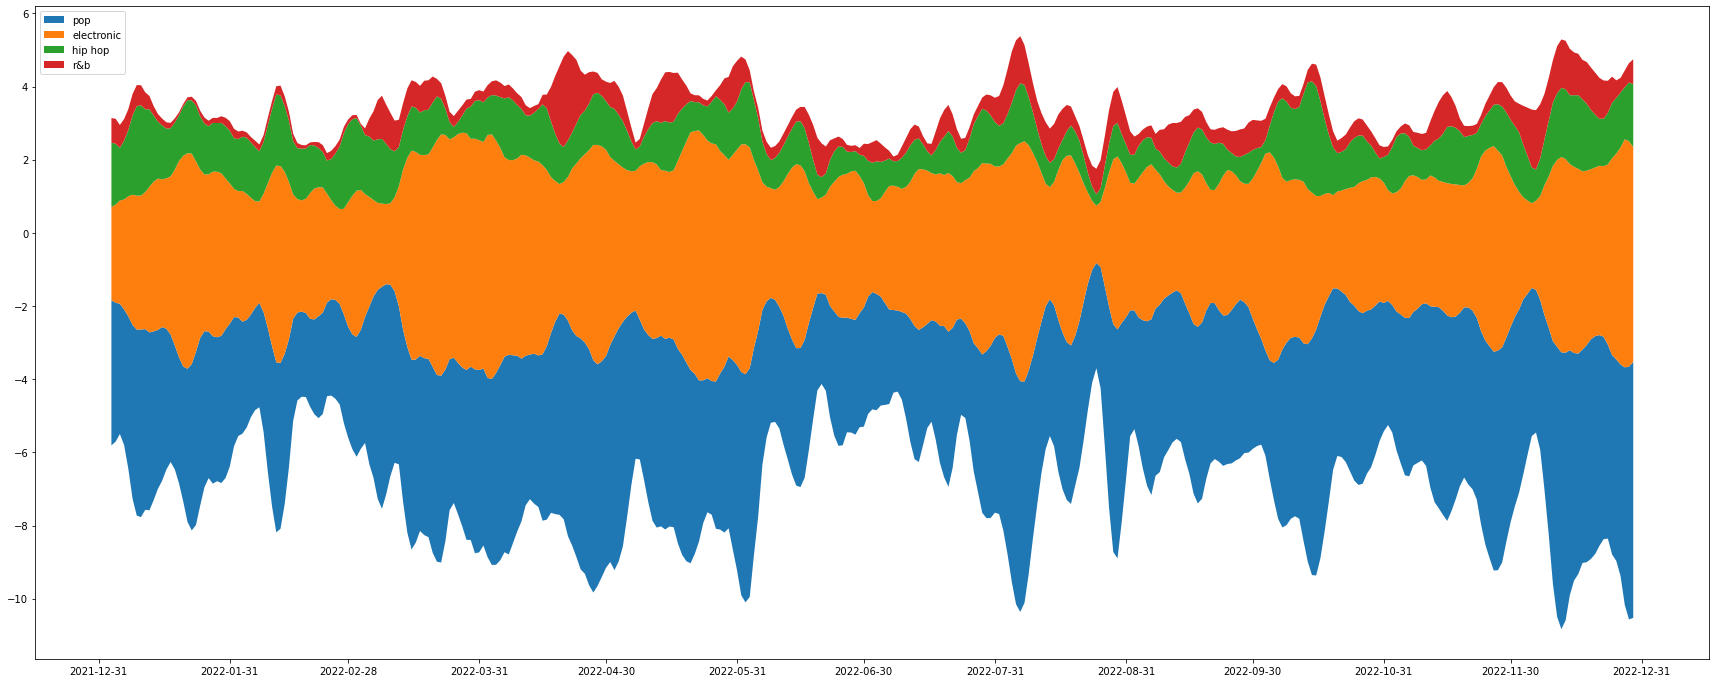

In [18]:

plt.figure(figsize=(30,12))
fig = plt.stackplot(genres_over_time['date'], [genres_over_time[genre+'_weekly_avg'] for genre in top_genres.keys()], labels = [genre for genre in top_genres.keys()], baseline='wiggle')
for x in fig:
    x.axes.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
plt.legend(loc='upper left')
plt.show()